In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [3]:
norm_annotations = pd.read_csv('data/annotated_aact/normalized_annotations_unique_19607.csv', index_col=False)
norm_annotations.head()

,Unnamed: 0,nct_id,canonical_BioLinkBERT-base_interventions,canonical_aact_interventions,aact_intervention_types,canonical_BioLinkBERT-base_conditions,canonical_aact_conditions,Disease Class
0,0,NCT00000117,intravenous immunoglobulin|ivig,immunoglobulin,Drug,multiple sclerosis|optic neuritis,optic neuritis,Cranial Nerve Diseases
1,1,NCT00000146,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
2,2,NCT00000147,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
3,3,NCT00000151,acetylsalicylic acid|aspirin,aspirin|acetylsalicylic acid,Drug|Procedure,blindness|diabetes mellitus|diabetic retinopat...,diabetic retinopathy|blindness,Neurologic Manifestations|unknown
4,4,NCT00000170,atropine,atropine|,Drug|Device,amblyopia|anisometropia|moderate amblyopia|str...,amblyopia,Neurologic Manifestations


In [4]:
norm_annotations.shape

(19607, 8)

In [5]:
trial_metadata= pd.read_csv('data/raw_aact/combined_neuro_designs_calculated_full_20240416.csv')
trial_metadata

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/3088525403.py:1: DtypeWarning: Columns (2,7,8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  aact_metadata= pd.read_csv('data/raw_aact/combined_neuro_designs_calculated_full_20240416.csv')


,nct_id,start_date,completion_date,phase,overall_status,country_name,primary_purpose,allocation,masking,number_of_facilities,were_results_reported,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,agency_class,lead_or_collaborator,sponsor_name,facility_name,country
0,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
1,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
2,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
3,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
4,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9259676,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,collaborator,"University of Maryland, Baltimore County",Maryland Treatment Centers,United States
9259677,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,lead,Potomac Health Foundations,Maryland Treatment Centers,United States
9259678,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,collaborator,"University of Maryland, Baltimore County",Maryland Treatment Centers,United States
9259679,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,lead,Potomac Health Foundations,Maryland Treatment Centers,United States


In [7]:
df = trial_metadata[trial_metadata['nct_id'].isin(norm_annotations['nct_id'])]
df

,nct_id,start_date,completion_date,phase,overall_status,country_name,primary_purpose,allocation,masking,number_of_facilities,were_results_reported,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,agency_class,lead_or_collaborator,sponsor_name,facility_name,country
0,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
1,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
2,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
3,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
4,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9259555,NCT06296082,2024-05-01,2027-06-30,Phase 2,Not yet recruiting,NaN,Treatment,Randomized,Double,NaN,False,1.0,11.0,3.0,OTHER,collaborator,McGill University,NaN,NaN
9259556,NCT06296082,2024-05-01,2027-06-30,Phase 2,Not yet recruiting,NaN,Treatment,Randomized,Double,NaN,False,1.0,11.0,3.0,OTHER,collaborator,Aragon Institute of Health Sciences,NaN,NaN
9259670,NCT06296875,2024-03-31,2026-03-31,Not Applicable,Not yet recruiting,United Kingdom,Prevention,Randomized,Triple,1.0,False,3.0,16.0,NaN,OTHER,lead,University of Glasgow,University of Glasgow,United Kingdom
9259671,NCT06296875,2024-03-31,2026-03-31,Not Applicable,Not yet recruiting,United Kingdom,Prevention,Randomized,Triple,1.0,False,3.0,16.0,NaN,OTHER,lead,University of Glasgow,University of Glasgow,United Kingdom


In [63]:
df.columns

Index(['nct_id', 'start_date', 'completion_date', 'phase', 'overall_status',
       'country_name', 'primary_purpose', 'allocation', 'masking',
       'number_of_facilities', 'were_results_reported',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure',
       'number_of_other_outcomes_to_measure', 'agency_class',
       'lead_or_collaborator', 'sponsor_name', 'facility_name', 'country',
       'start_year', 'completion_year'],
      dtype='object')

In [8]:
len(set(df['nct_id']))

19607

# Descriptive Stats

## General

In [9]:
# Convert date columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['completion_date'] = pd.to_datetime(df['completion_date'])

# Extract year component and create new columns
df['start_year'] = df['start_date'].dt.year
df['completion_year'] = df['completion_date'].dt.year

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/1323219768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(df['start_date'])
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/1323219768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_date'] = pd.to_datetime(df['completion_date'])
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/1323219768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

In [85]:
trial_metadata = df[['nct_id','start_year', 'completion_year', 'phase', 'overall_status','primary_purpose']]

In [65]:
trial_metadata

,nct_id,start_year,completion_year,phase,overall_status,primary_purpose
0,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
1,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
2,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
3,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
4,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
...,...,...,...,...,...,...
9259555,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259556,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259670,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention
9259671,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention


### Primary Purpose

19285


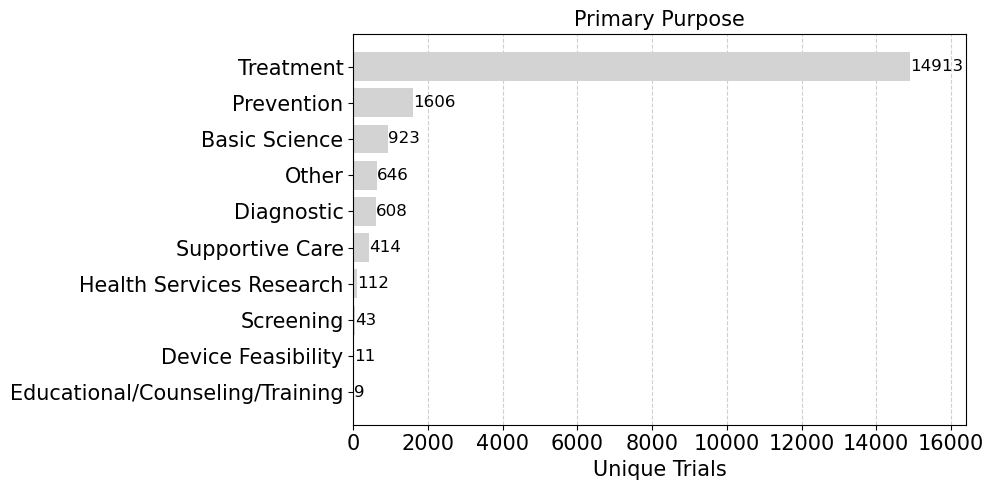

In [67]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'primary_purpose']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['primary_purpose'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)
print(sum(phase_type_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Unique Trials', fontsize=15)
plt.title('Primary Purpose', fontsize=15)
plt.xlim(0, max(phase_type_counts)+1500) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/primary_purpose_{len(unique_pairs_phase)}.pdf')

# Display the chart
plt.show()

### Phase

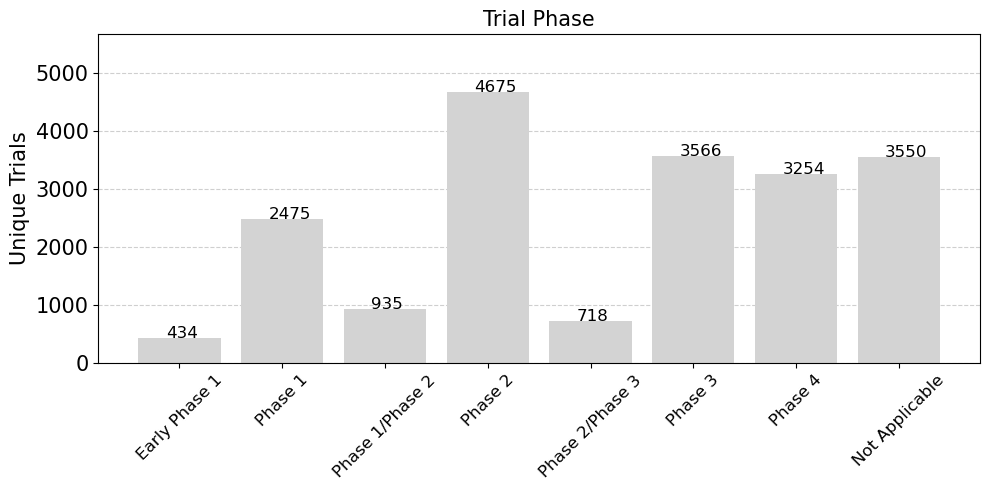

In [47]:
import matplotlib.pyplot as plt

# Defining the order of phases
phase_order = [
    'Early Phase 1', 
    'Phase 1',
    'Phase 1/Phase 2',
    'Phase 2', 
    'Phase 2/Phase 3', 
    'Phase 3', 
    'Phase 4', 
    'Not Applicable'
]

# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'phase']].drop_duplicates()
#unique_pairs_phase['phase'].fillna('Unknown', inplace=True)
#unique_pairs_phase.replace({'': 'Unknown'}, inplace=True)

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['phase'].value_counts()

# Reindexing phase_type_counts based on the phase_order and filling missing values with 0
phase_type_counts = phase_type_counts.reindex(phase_order, fill_value=0)

plt.figure(figsize=(10, 5))
bars = plt.bar(phase_type_counts.index, phase_type_counts, color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, height, f'{height}', fontsize=12)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)  # Change axis to 'y' for horizontal gridlines
plt.ylabel('Unique Trials', fontsize=15)  # Changed to ylabel
plt.title('Trial Phase', fontsize=15)
plt.ylim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/phase_frequency_{len(unique_pairs_phase)}.pdf')

# Display the chart
plt.show()


### Overall Status

19607


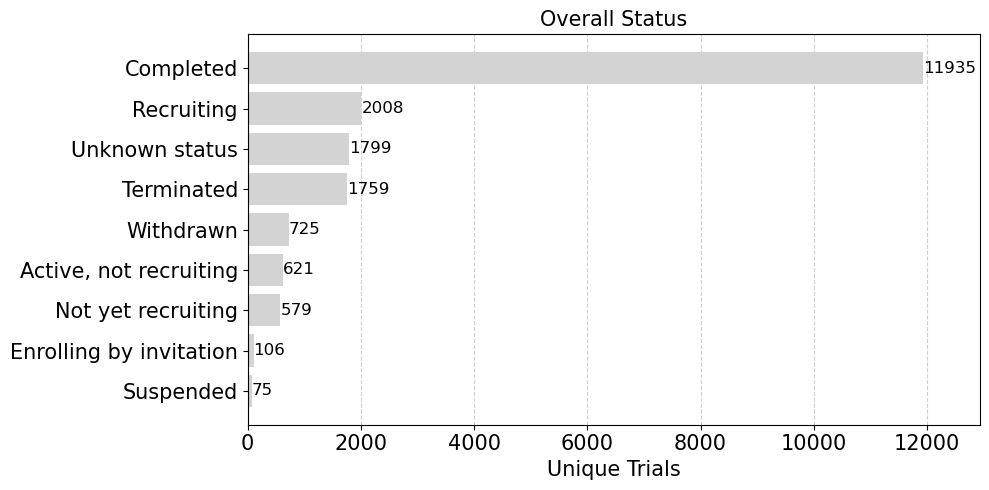

In [51]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['overall_status'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)
print(sum(phase_type_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Unique Trials', fontsize=15)
plt.title('Overall Status', fontsize=15)
plt.xlim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/trial_status_frequency.png')

# Display the chart
plt.show()

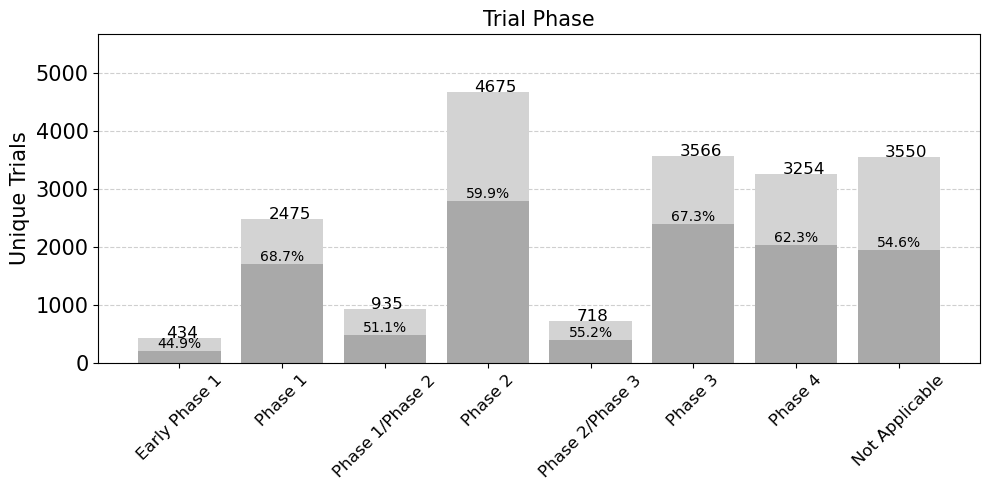

In [62]:
import matplotlib.pyplot as plt

# Defining the order of phases
phase_order = [
    'Early Phase 1', 
    'Phase 1',
    'Phase 1/Phase 2',
    'Phase 2', 
    'Phase 2/Phase 3', 
    'Phase 3', 
    'Phase 4', 
    'Not Applicable'
]

# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'phase', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['phase'].value_counts()

# Reindexing phase_type_counts based on the phase_order and filling missing values with 0
phase_type_counts = phase_type_counts.reindex(phase_order, fill_value=0)

# Calculate the count and proportion of completed trials for each phase
completed_count = unique_pairs_phase[unique_pairs_phase['overall_status'] == 'Completed']['phase'].value_counts()
completed_count = completed_count.reindex(phase_order, fill_value=0)

completed_proportion = completed_count / phase_type_counts * 100

plt.figure(figsize=(10, 5))

# Add labels to each bar
for bar, prop in zip(completed_bars, completed_proportion):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{prop:.1f}%', ha='center', va='bottom', fontsize=10)

# Adding bars for total trials
total_bars = plt.bar(phase_type_counts.index, phase_type_counts, color='lightgrey', zorder=2)
completed_bars = plt.bar(completed_count.index, completed_count, color='darkgrey', zorder=2)

# Add labels to each bar
for bar in total_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, height, f'{height}', fontsize=12)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)  # Change axis to 'y' for horizontal gridlines
plt.ylabel('Unique Trials', fontsize=15)  # Changed to ylabel
plt.title('Trial Phase', fontsize=15)
plt.ylim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/completed_by_phase_frequency_{len(unique_pairs_phase)}.pdf')

# Display the chart
plt.show()


### Start/ Completion Years

In [68]:
trial_metadata

,nct_id,start_year,completion_year,phase,overall_status,primary_purpose
0,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
1,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
2,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
3,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
4,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
...,...,...,...,...,...,...
9259555,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259556,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259670,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention
9259671,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention


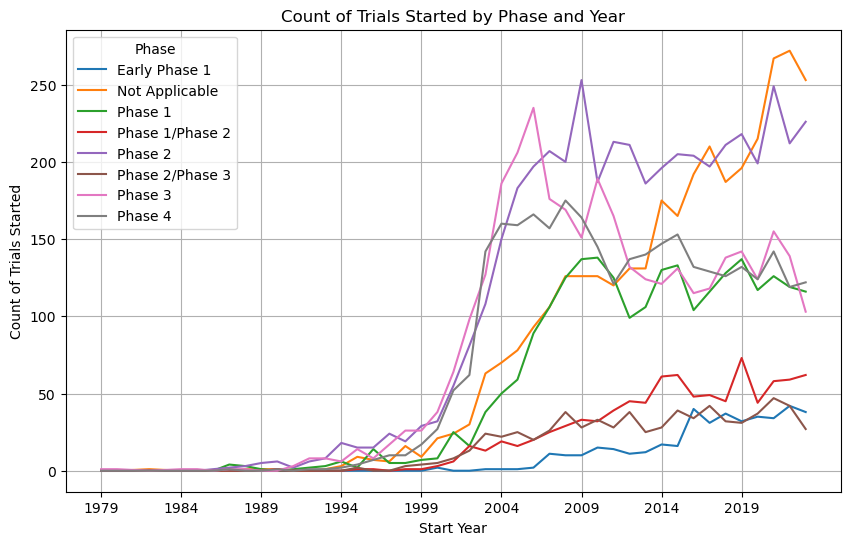

In [89]:
filtered_data = trial_metadata[['nct_id', 'phase', 'start_year']][trial_metadata['start_year'] < 2024].drop_duplicates()

# Grouping data by phase and start year, then counting the number of trials for each group
trial_counts = filtered_data.groupby(['phase', 'start_year']).size().unstack(fill_value=0)

# Plotting the line chart for each phase
plt.figure(figsize=(10, 6))
for phase in trial_counts.index:
    plt.plot(trial_counts.columns, trial_counts.loc[phase], label=phase)

# Adding labels, legend, and title
plt.xlabel('Start Year')
plt.ylabel('Count of Trials Started')
plt.title('Count of Trials Started by Phase and Year')
plt.legend(title='Phase')
plt.grid(True)

# Set x-axis tick labels to every 5 years
plt.xticks(np.arange(min(trial_counts.columns), max(trial_counts.columns)+1, 5))

plt.savefig(f'viz/trial_characteristics/general/phase_over_time_{len(unique_pairs_phase)}.pdf')

# Show plot
plt.show()

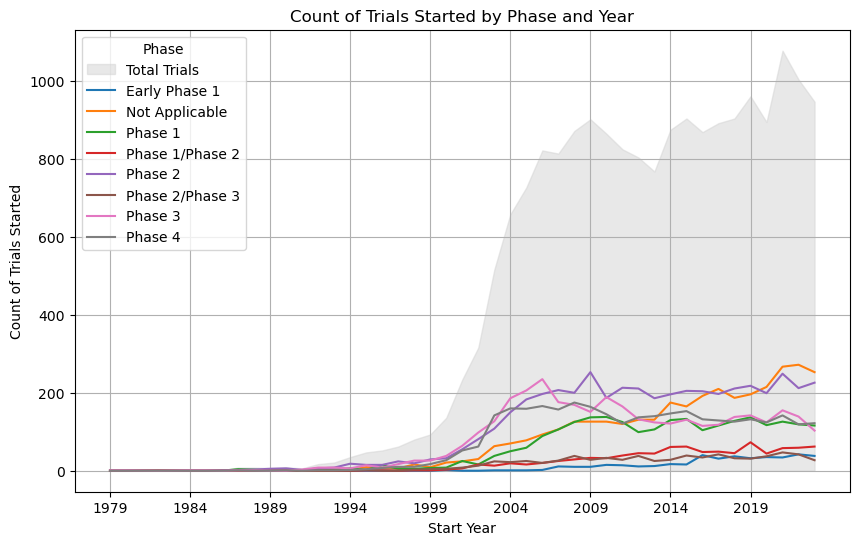

In [88]:
# Assuming 'trial_metadata' and previous preprocessing steps have been properly executed
filtered_data = trial_metadata[['nct_id', 'phase', 'start_year']][trial_metadata['start_year'] < 2024].drop_duplicates()

# Grouping data by phase and start year, then counting the number of trials for each group
trial_counts = filtered_data.groupby(['phase', 'start_year']).size().unstack(fill_value=0)

# Compute the total trials per year across all phases
total_trials_per_year = trial_counts.sum(axis=0)

# Plotting the area chart for total trials in the background
plt.figure(figsize=(10, 6))
plt.fill_between(total_trials_per_year.index, total_trials_per_year, color='lightgray', alpha=0.5, label='Total Trials')

# Plotting the line chart for each phase over the area chart
for phase in trial_counts.index:
    plt.plot(trial_counts.columns, trial_counts.loc[phase], label=phase)

# Adding labels, legend, and title
plt.xlabel('Start Year')
plt.ylabel('Count of Trials Started')
plt.title('Count of Trials Started by Phase and Year')
plt.legend(title='Phase',loc='upper left')
plt.grid(True)

# Set x-axis tick labels to every 5 years
plt.xticks(np.arange(min(trial_counts.columns), max(trial_counts.columns)+1, 5))

# Saving the figure to a PDF file
plt.savefig(f'viz/trial_characteristics/general/phase_over_time_with_total_{len(unique_pairs_phase)}.pdf')

# Show plot
plt.show()

## Design Characteristics

In [81]:
df.columns

Index(['nct_id', 'start_date', 'completion_date', 'phase', 'overall_status',
       'country_name', 'primary_purpose', 'allocation', 'masking',
       'number_of_facilities', 'were_results_reported',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure',
       'number_of_other_outcomes_to_measure', 'agency_class',
       'lead_or_collaborator', 'sponsor_name', 'facility_name', 'country',
       'start_year', 'completion_year'],
      dtype='object')

In [95]:
trial_design = df[['nct_id','allocation', 'masking', 'number_of_primary_outcomes_to_measure', 'number_of_secondary_outcomes_to_measure', 'number_of_other_outcomes_to_measure','number_of_facilities', 'country']]

In [96]:
trial_design.fillna('not reported', inplace=True)
trial_design

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/27152776.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'not reported' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  trial_design.fillna('not reported', inplace=True)
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/27152776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_design.fillna('not reported', inplace=True)


,nct_id,allocation,masking,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,number_of_facilities,country
0,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
1,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
2,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
3,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
4,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
...,...,...,...,...,...,...,...,...
9259555,NCT06296082,Randomized,Double,1.0,11.0,3.0,not reported,not reported
9259556,NCT06296082,Randomized,Double,1.0,11.0,3.0,not reported,not reported
9259670,NCT06296875,Randomized,Triple,3.0,16.0,not reported,1.0,United Kingdom
9259671,NCT06296875,Randomized,Triple,3.0,16.0,not reported,1.0,United Kingdom


### Allocation and Masking

In [92]:
set(trial_design['allocation'])

{'Non-Randomized', 'Randomized', 'not reported'}

In [97]:
set(trial_design['masking'])

{'Double',
 'None (Open Label)',
 'Quadruple',
 'Single',
 'Triple',
 'not reported'}

19607


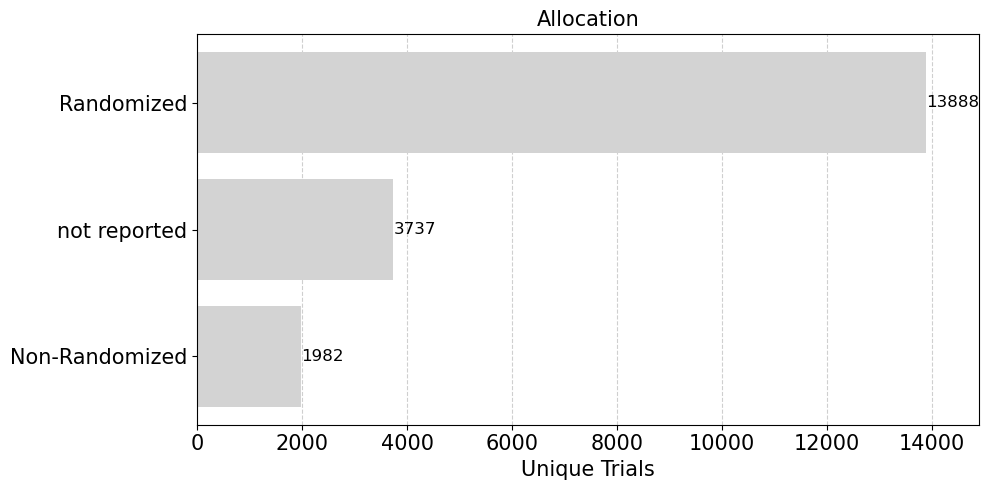

In [103]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_design[['nct_id', 'allocation']].drop_duplicates()

# Counting the number of nct_ids per phase type
allocation_counts = unique_pairs_phase['allocation'].value_counts()
allocation_counts = allocation_counts.sort_values(ascending=True)
print(sum(allocation_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(allocation_counts.index, allocation_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Unique Trials', fontsize=15)
plt.title('Allocation', fontsize=15)
plt.xlim(0, max(allocation_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/allocation_frequency.png')

# Display the chart
plt.show()

19607


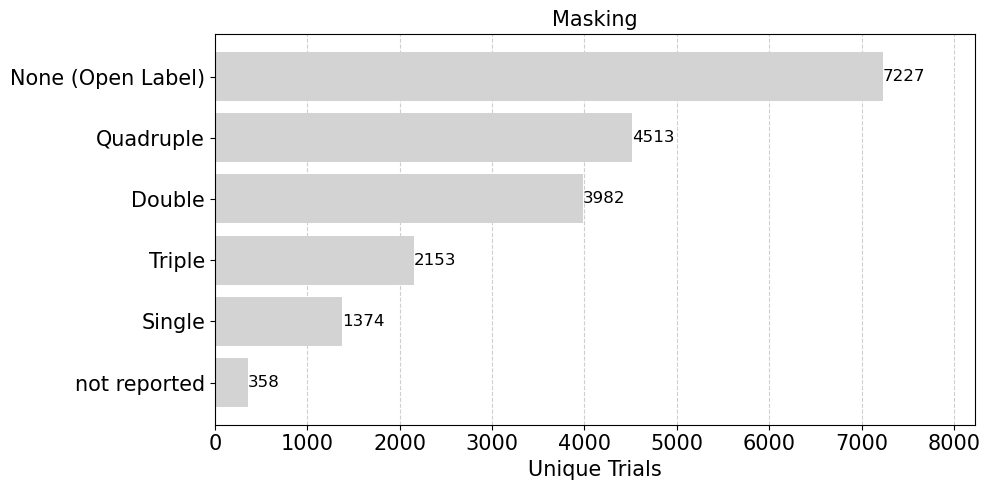

In [104]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_design[['nct_id', 'masking']].drop_duplicates()

# Counting the number of nct_ids per phase type
masking_counts = unique_pairs_phase['masking'].value_counts()
masking_counts = masking_counts.sort_values(ascending=True)
print(sum(masking_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(masking_counts.index, masking_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Unique Trials', fontsize=15)
plt.title('Masking', fontsize=15)
plt.xlim(0, max(masking_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/masking_frequency.png')

# Display the chart
plt.show()

In [109]:
sum(allocation_counts), sum(masking_counts)

(19607, 19607)

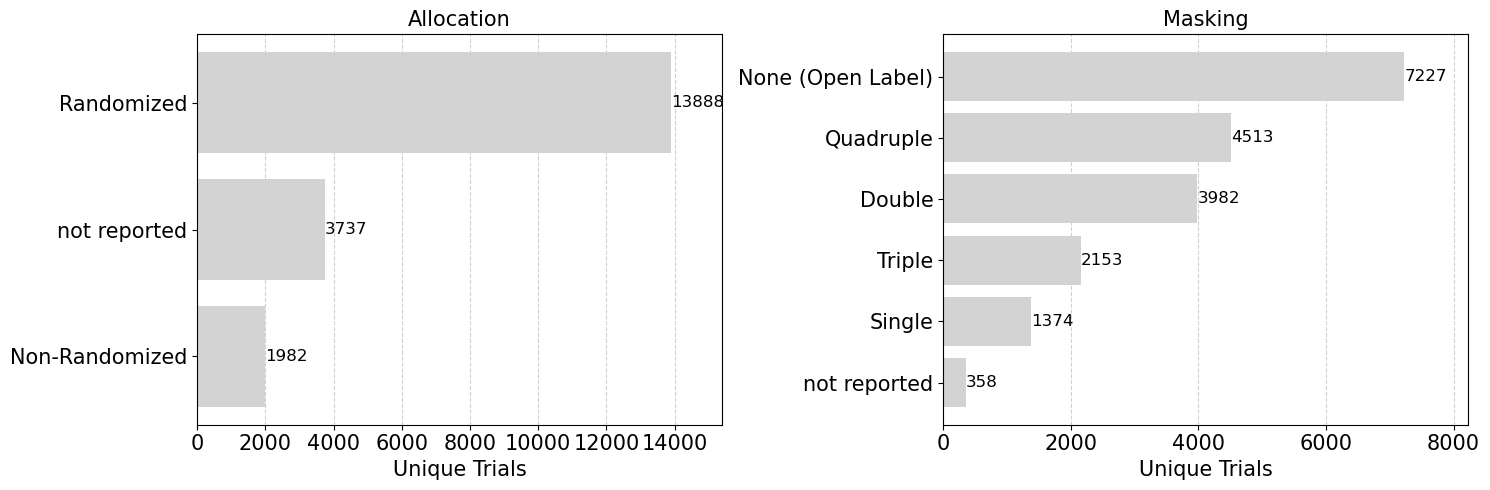

In [107]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Allocation
bars_0 = axs[0].barh(allocation_counts.index, allocation_counts, color='lightgrey', zorder=2)
for bar in bars_0:
    width = bar.get_width()
    axs[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
axs[0].tick_params(axis='y', labelsize=15)
axs[0].tick_params(axis='x', labelsize=15)
axs[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[0].set_xlabel('Unique Trials', fontsize=15)
axs[0].set_title('Allocation', fontsize=15)
axs[0].set_xlim(0, max(allocation_counts)+1500) # Adjusted to max count for relevancy

# Plot for Masking
bars_1 = axs[1].barh(masking_counts.index, masking_counts, color='lightgrey', zorder=2)
for bar in bars_1:
    width = bar.get_width()
    axs[1].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
axs[1].tick_params(axis='y', labelsize=15)
axs[1].tick_params(axis='x', labelsize=15)
axs[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[1].set_xlabel('Unique Trials', fontsize=15)
axs[1].set_title('Masking', fontsize=15)
axs[1].set_xlim(0, max(masking_counts)+1000) # Adjusted to max count for relevancy

# Adjust layout
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/allocation_and_masking_frequency.png')

# Display the plots
plt.show()


### Number of Facilities

In [178]:
unique_pairs_facilities = trial_design[['nct_id', 'number_of_facilities']].drop_duplicates()
unique_pairs_facilities

,nct_id,number_of_facilities
0,NCT00000117,2.0
17,NCT00000146,15.0
107,NCT00000147,15.0
197,NCT00000151,not reported
205,NCT00000170,1.0
...,...,...
9259445,NCT06293911,1.0
9259456,NCT06294236,not reported
9259477,NCT06294821,not reported
9259545,NCT06296082,not reported


In [179]:
len(unique_pairs_facilities[unique_pairs_facilities["number_of_facilities"]==1])

11219

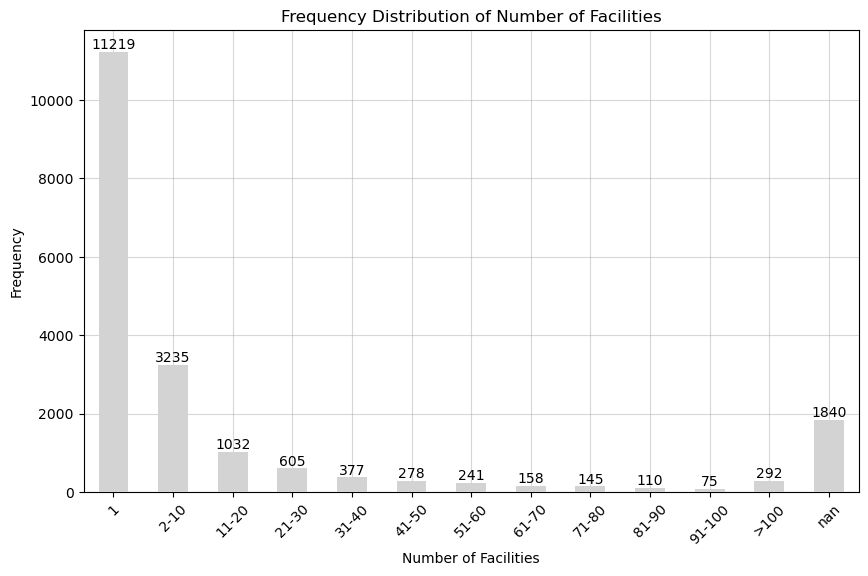

(None,
 binned
 1         11219.0
 2-10       3235.0
 11-20      1032.0
 21-30       605.0
 31-40       377.0
 41-50       278.0
 51-60       241.0
 61-70       158.0
 71-80       145.0
 81-90       110.0
 91-100       75.0
 >100        292.0
 NaN        1840.0
 Name: count, dtype: float64)

In [147]:
# Convert the 'number_of_facilities' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_facilities['number_of_facilities'] = pd.to_numeric(unique_pairs_facilities['number_of_facilities'], errors='coerce')

# Define the bins and labels
bins = [0, 2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '>100']

# Bin the data
unique_pairs_facilities['binned'] = pd.cut(unique_pairs_facilities['number_of_facilities'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts = unique_pairs_facilities['binned'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts[np.nan] = len(unique_pairs_facilities[unique_pairs_facilities['number_of_facilities'].isna()])

# Plot

plt.figure(figsize=(10, 6))

ax = bin_counts.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')
    
plt.title('Frequency Distribution of Number of Facilities')
plt.xlabel('Number of Facilities')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

plt.savefig(f'viz/trial_characteristics/design/nr_facilities_frequency.png')

plt.show(), bin_counts

### Number of Outcomes

In [148]:
trial_design.head()

,nct_id,allocation,masking,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,number_of_facilities,country
0,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
1,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
2,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
3,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States
4,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States


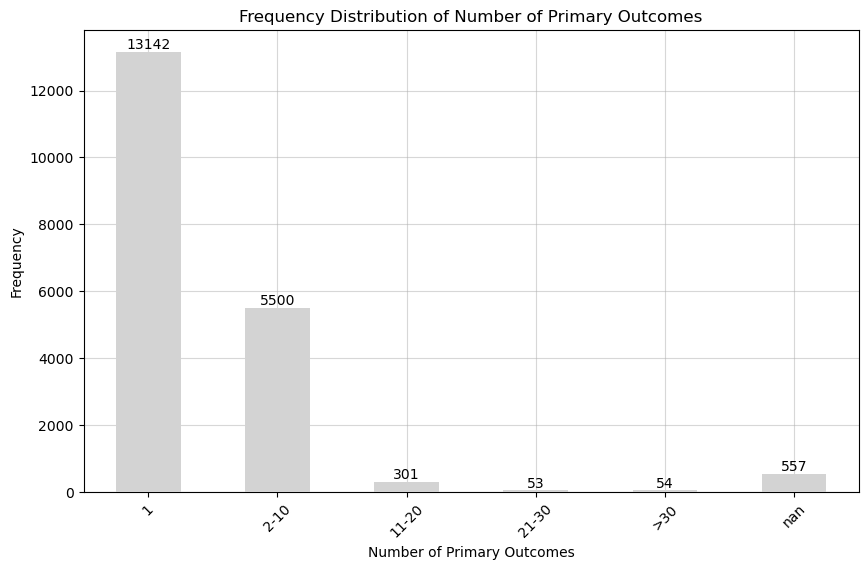

(None,
 binned_primary_outcomes
 1        13142.0
 2-10      5500.0
 11-20      301.0
 21-30       53.0
 >30         54.0
 NaN        557.0
 Name: count, dtype: float64)

In [208]:
unique_pairs_primary_outocome = trial_design[['nct_id', 'number_of_primary_outcomes_to_measure']].drop_duplicates()

# Convert the 'number_of_primary_outcomes_to_measure' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'] = pd.to_numeric(unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'], errors='coerce')

# Define the bins and labels up to >30
bins = [0, 2, 10, 20, 30, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '>30']


# Bin the data
unique_pairs_primary_outocome['binned_primary_outcomes'] = pd.cut(unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts_primary_outcomes = unique_pairs_primary_outocome['binned_primary_outcomes'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts_primary_outcomes[np.nan] = len(unique_pairs_primary_outocome[unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'].isna()])

# Plot
plt.figure(figsize=(10, 6))

ax = bin_counts_primary_outcomes.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts_primary_outcomes):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')

plt.title('Frequency Distribution of Number of Primary Outcomes')
plt.xlabel('Number of Primary Outcomes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

plt.savefig(f'viz/trial_characteristics/design/nr_primary_outcomes_frequency.png')

plt.show(), bin_counts_primary_outcomes


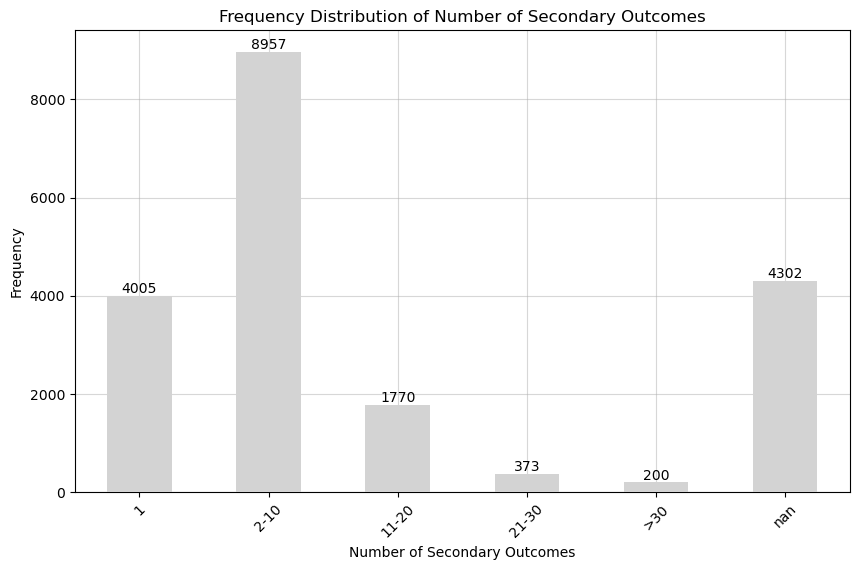

(None,
 binned_secondary_outcomes
 1        4005.0
 2-10     8957.0
 11-20    1770.0
 21-30     373.0
 >30       200.0
 NaN      4302.0
 Name: count, dtype: float64)

In [209]:
unique_pairs_secondary_outocome = trial_design[['nct_id', 'number_of_secondary_outcomes_to_measure']].drop_duplicates()

# Convert the 'number_of_secondary_outcomes_to_measure' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'] = pd.to_numeric(unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'], errors='coerce')

# Define the bins and labels
bins = [0, 2, 10, 20, 30, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '>30']

# Bin the data
unique_pairs_secondary_outocome['binned_secondary_outcomes'] = pd.cut(unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts_secondary_outcomes = unique_pairs_secondary_outocome['binned_secondary_outcomes'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts_secondary_outcomes[np.nan] = len(unique_pairs_secondary_outocome[unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'].isna()])

# Plot
plt.figure(figsize=(10, 6))

ax = bin_counts_secondary_outcomes.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts_secondary_outcomes):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')

plt.title('Frequency Distribution of Number of Secondary Outcomes')
plt.xlabel('Number of Secondary Outcomes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

plt.savefig(f'viz/trial_characteristics/design/nr_secondary_outcomes_frequency.png')

plt.show(), bin_counts_secondary_outcomes


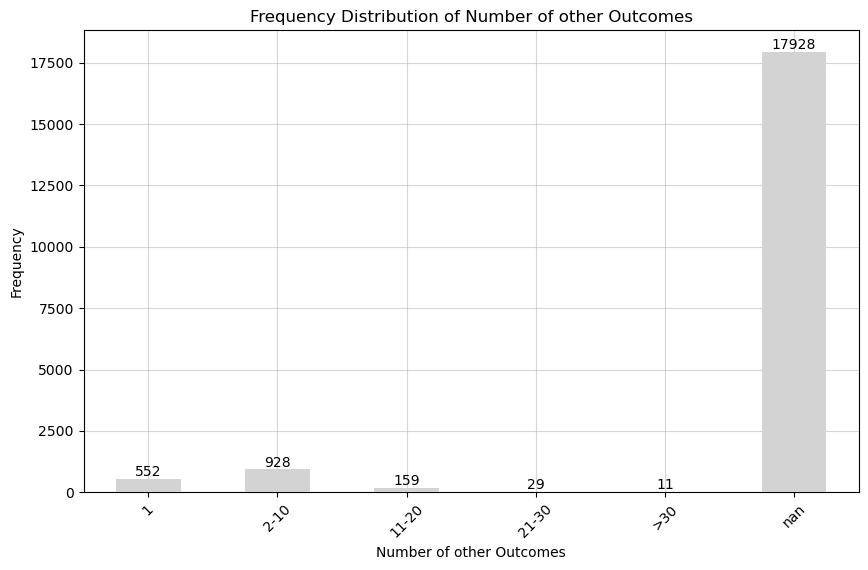

(None,
 binned_other_outcomes
 1          552.0
 2-10       928.0
 11-20      159.0
 21-30       29.0
 >30         11.0
 NaN      17928.0
 Name: count, dtype: float64)

In [210]:
unique_pairs_other_outocome = trial_design[['nct_id', 'number_of_other_outcomes_to_measure']].drop_duplicates()

# Convert the 'number_of_other_outcomes_to_measure' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_other_outocome['number_of_other_outcomes_to_measure'] = pd.to_numeric(unique_pairs_other_outocome['number_of_other_outcomes_to_measure'], errors='coerce')

# Define the bins and labels
bins = [0, 2, 10, 20, 30, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '>30']

# Bin the data
unique_pairs_other_outocome['binned_other_outcomes'] = pd.cut(unique_pairs_other_outocome['number_of_other_outcomes_to_measure'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts_other_outcomes = unique_pairs_other_outocome['binned_other_outcomes'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts_other_outcomes[np.nan] = len(unique_pairs_other_outocome[unique_pairs_other_outocome['number_of_other_outcomes_to_measure'].isna()])

# Plot
plt.figure(figsize=(10, 6))

ax = bin_counts_other_outcomes.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts_other_outcomes):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')

plt.title('Frequency Distribution of Number of other Outcomes')
plt.xlabel('Number of other Outcomes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

plt.savefig(f'viz/trial_characteristics/design/nr_other_outcomes_frequency.png')

plt.show(), bin_counts_other_outcomes

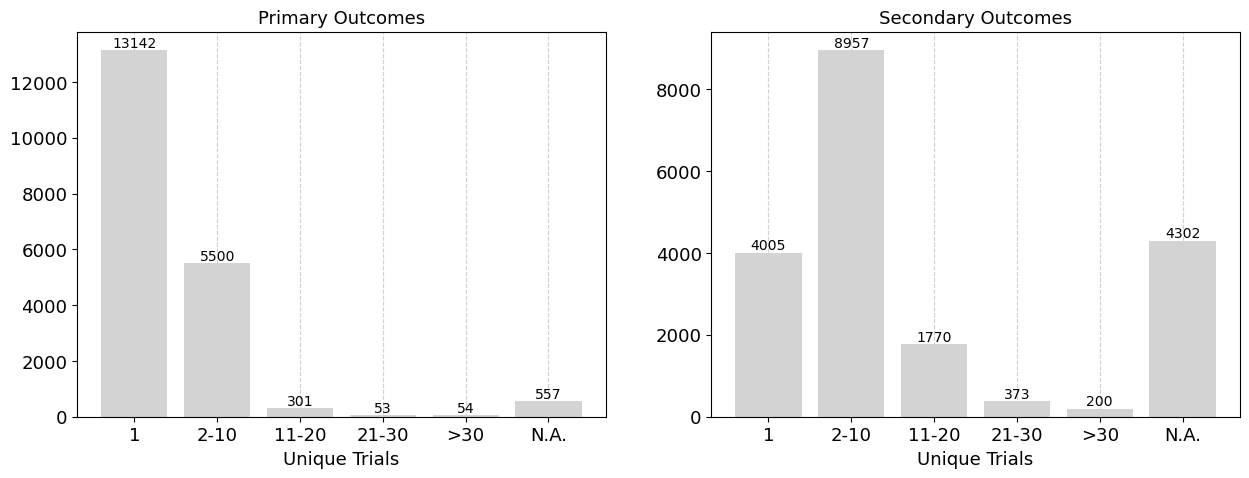

In [219]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

bin_counts_primary_outcomes = bin_counts_primary_outcomes.rename(index={pd.NA: 'N.A.'})
bin_counts_primary_outcomes.index = bin_counts_primary_outcomes.index.fillna('N.A.').astype(str)
# Plot for Allocation
bars_0 = axs[0].bar(bin_counts_primary_outcomes.index, bin_counts_primary_outcomes, color='lightgrey', zorder=2)

for i, value in enumerate(bin_counts_primary_outcomes):
    axs[0].text(i, value + 0.1, str(int(value)), ha='center', va='bottom')
    
axs[0].tick_params(axis='y', labelsize=13)
axs[0].tick_params(axis='x', labelsize=13)
axs[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[0].set_xlabel('Unique Trials', fontsize=13)
axs[0].set_title('Primary Outcomes', fontsize=13)
#axs[0].set_xlim(0, max(allocation_counts)+1500) # Adjusted to max count for relevancy

bin_counts_secondary_outcomes = bin_counts_secondary_outcomes.rename(index={pd.NA: 'N.A.'})
bin_counts_secondary_outcomes.index = bin_counts_secondary_outcomes.index.fillna('N.A.').astype(str)
# Plot for Allocation
bars_1 = axs[1].bar(bin_counts_secondary_outcomes.index, bin_counts_secondary_outcomes, color='lightgrey', zorder=2)

for i, value in enumerate(bin_counts_secondary_outcomes):
    axs[1].text(i, value + 0.1, str(int(value)), ha='center', va='bottom')
    
axs[1].tick_params(axis='y', labelsize=13)
axs[1].tick_params(axis='x', labelsize=13)
axs[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[1].set_xlabel('Unique Trials', fontsize=13)
axs[1].set_title('Secondary Outcomes', fontsize=13)

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/outcomes_primary_secondary_number_frequency.png')

# Display the plots
plt.show()


## Funding and Locations

In [220]:
df.columns

Index(['nct_id', 'start_date', 'completion_date', 'phase', 'overall_status',
       'country_name', 'primary_purpose', 'allocation', 'masking',
       'number_of_facilities', 'were_results_reported',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure',
       'number_of_other_outcomes_to_measure', 'agency_class',
       'lead_or_collaborator', 'sponsor_name', 'facility_name', 'country',
       'start_year', 'completion_year'],
      dtype='object')

In [231]:
df_funding = df[['nct_id', 'start_year', 'agency_class', 'lead_or_collaborator', 'sponsor_name']].drop_duplicates()

In [238]:
df_funding.shape

(31457, 5)

In [272]:
df_funding = df_funding[df_funding['lead_or_collaborator']=='lead']
# Define a function to replace agency_class based on sponsor_name
def replace_agency_class(row):
    if 'university' in row['sponsor_name'].lower() or ('universita' in row['sponsor_name'].lower()) or ('université' in row['sponsor_name'].lower()) or ('universität' in row['sponsor_name'].lower()) or ('universiteit' in row['sponsor_name'].lower())or ('universidad' in row['sponsor_name'].lower()):
        return 'UNIVERSITY'
    elif 'hospital' in row['sponsor_name'].lower():
        return 'HOSPITAL'
    else:
        return row['agency_class']

# Apply the function
df_funding['agency_class'] = df_funding.apply(replace_agency_class, axis=1)
df_funding[df_funding['agency_class']=='OTHER']

,nct_id,start_year,agency_class,lead_or_collaborator,sponsor_name
205,NCT00000170,1999.0,OTHER,lead,Jaeb Center for Health Research
1881,NCT00000212,1987.0,OTHER,lead,New York State Psychiatric Institute
1887,NCT00000213,1990.0,OTHER,lead,New York State Psychiatric Institute
1893,NCT00000214,1992.0,OTHER,lead,New York State Psychiatric Institute
2097,NCT00000270,1995.0,OTHER,lead,New York State Psychiatric Institute
...,...,...,...,...,...
9258033,NCT06276374,2024.0,OTHER,lead,Woo-Keun Seo
9258036,NCT06276504,2024.0,OTHER,lead,Assistance Publique - Hôpitaux de Paris
9258246,NCT06280092,2024.0,OTHER,lead,Sanjeet S. Grewal
9258340,NCT06281925,2024.0,OTHER,lead,NYU Langone Health


In [273]:
df_funding[df_funding['agency_class']=='OTHER'].to_csv("funding_other.csv")

19607


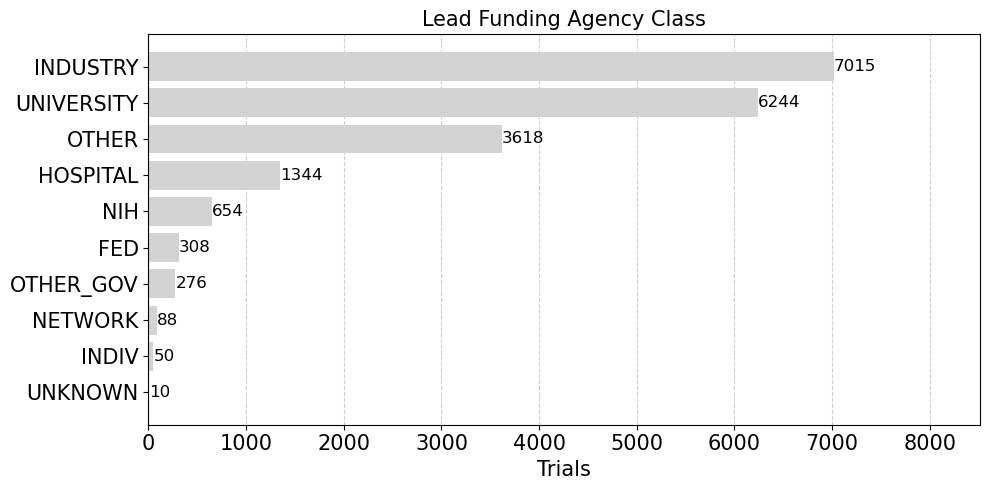

In [275]:
# Counting the number of nct_ids per phase type
funding_counts = df_funding['agency_class'].value_counts()
funding_counts = funding_counts.sort_values(ascending=True)
print(sum(funding_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(funding_counts.index, funding_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Trials', fontsize=15)
plt.title('Lead Funding Agency Class', fontsize=15)
plt.xlim(0, max(funding_counts)+1500) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/lead_funding_agency_{len(unique_pairs_phase)}.pdf')

# Display the chart
plt.show()

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/3572351226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['start_year'] = df_filtered['start_year'].astype(int)


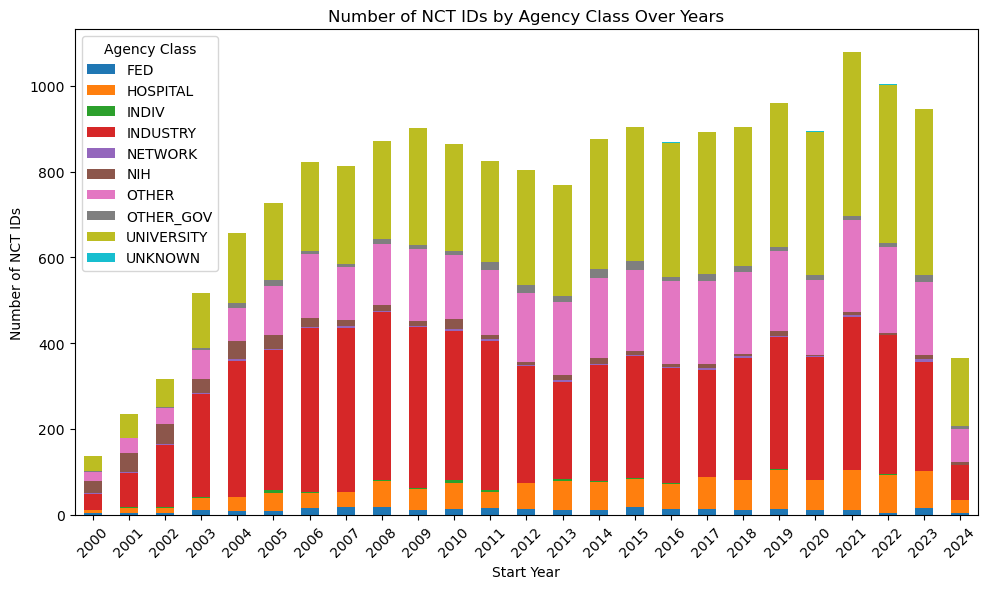

In [288]:
df_filtered = df_funding[(df_funding['start_year'] >= 2000) & (df_funding['start_year'] <= 2024)]
df_filtered['start_year'] = df_filtered['start_year'].astype(int)

pivot_table = df_filtered.pivot_table(index='start_year', columns='agency_class', values='nct_id', aggfunc='count', fill_value=0)

# Plotting the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))  # You can also try kind='line' for a line plot
ax.set_title('Number of NCT IDs by Agency Class Over Years')
ax.set_xlabel('Start Year')
ax.set_ylabel('Number of NCT IDs')
plt.xticks(rotation=45)
plt.legend(title='Agency Class')
plt.tight_layout()  # Adjust subplots to give some room for the labels

# Show the plot
plt.show()

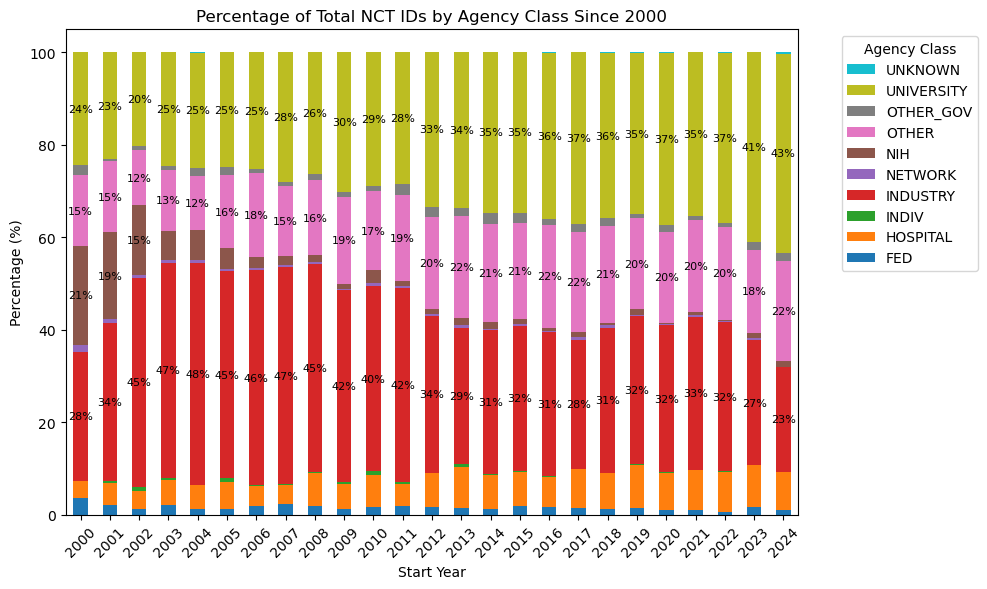

In [293]:
# Creating a pivot table with counts per agency_class and year
pivot_table_counts = df_filtered.pivot_table(index='start_year', columns='agency_class', values='nct_id', aggfunc='count', fill_value=0)

# Calculate the total for each year
total_per_year = pivot_table_counts.sum(axis=1)

# Calculate percentages and normalize to 100%
pivot_table_percentage = pivot_table_counts.divide(total_per_year, axis=0) * 100

# Verify the percentages sum to 100% per year
#print(pivot_table_percentage.sum(axis=1))  # This should print 100 for each year

fig, ax = plt.subplots(figsize=(10, 6))

bars = pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax, legend=False)
ax.set_title('Percentage of Total NCT IDs by Agency Class Since 2000')
ax.set_xlabel('Start Year')
ax.set_ylabel('Percentage (%)')

# Get handles and labels, reverse them, and then apply them to the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Agency Class', bbox_to_anchor=(1.05, 1), loc='upper left')

#ax.legend(title='Agency Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding text inside the bars
for bars_stack in bars.containers:
    ax.bar_label(bars_stack, labels=[f'{v:.0f}%' if v > 10 else '' for v in bars_stack.datavalues], label_type='center', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'viz/trial_characteristics/general/lead_funding_agency_over_time_{len(unique_pairs_phase)}.pdf')

plt.show()

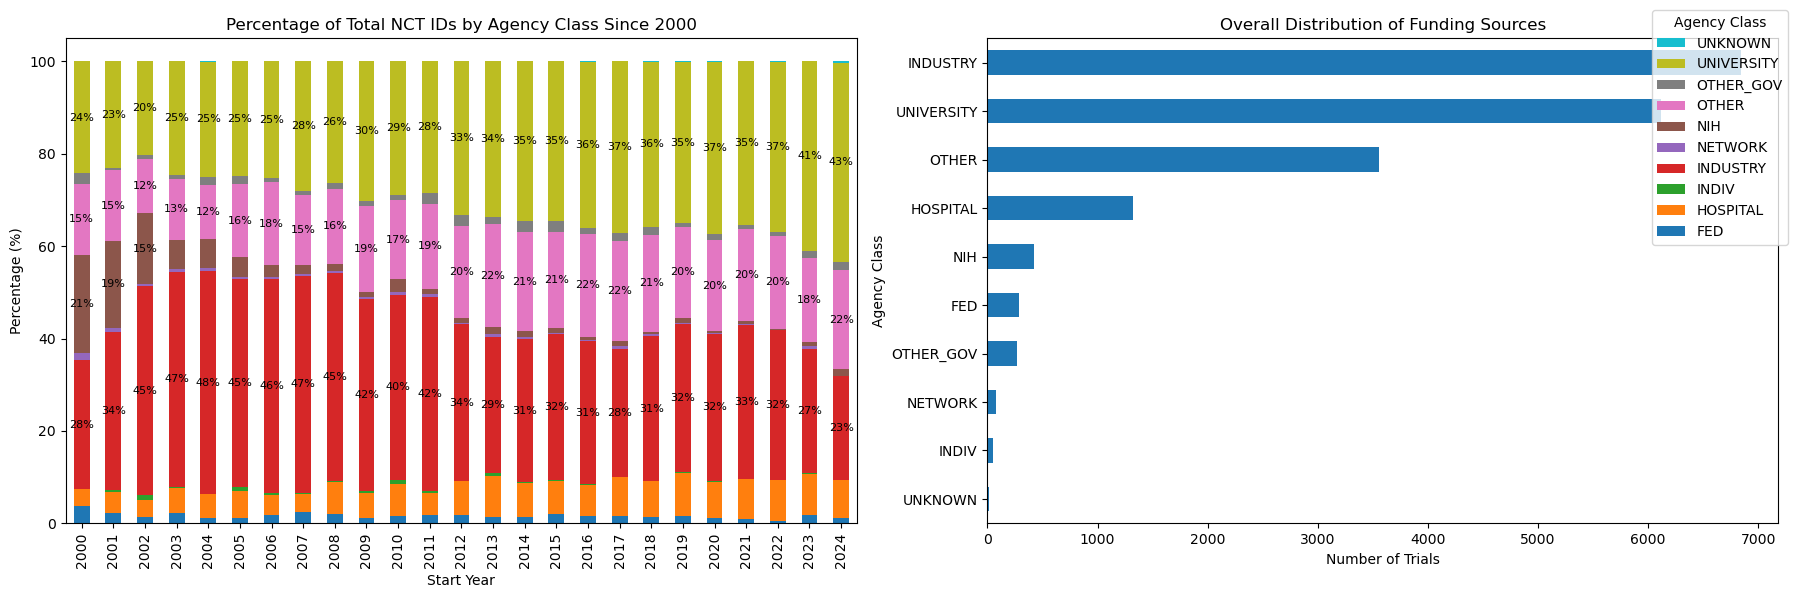

In [298]:
# Creating a pivot table with counts per agency_class and year
pivot_table_counts = df_filtered.pivot_table(index='start_year', columns='agency_class', values='nct_id', aggfunc='count', fill_value=0)

# Calculate the total for each year
total_per_year = pivot_table_counts.sum(axis=1)

# Calculate percentages and normalize to 100%
pivot_table_percentage = pivot_table_counts.divide(total_per_year, axis=0) * 100

# Calculate the overall distribution across all years
overall_distribution = pivot_table_counts.sum(axis=0).sort_values(ascending=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1 - Yearly Distribution
pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax1, legend=False)
ax1.set_title('Percentage of Total NCT IDs by Agency Class Since 2000')
ax1.set_xlabel('Start Year')
ax1.set_ylabel('Percentage (%)')

# Adding text inside the bars
for bars_stack in ax1.containers:
    ax1.bar_label(bars_stack, labels=[f'{v:.0f}%' if v > 10 else '' for v in bars_stack.datavalues], label_type='center', fontsize=8)

# Plot 2 - Overall Distribution
overall_distribution.plot(kind='barh', ax=ax2)
ax2.set_title('Overall Distribution of Funding Sources')
ax2.set_xlabel('Number of Trials')
ax2.set_ylabel('Agency Class')

# Synchronize legend for both plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles[::-1], labels[::-1], title='Agency Class', loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [236]:
# Function to concatenate columns into a comma-separated string after sorting them alphabetically
def combine_and_sort_columns(series):
    return ', '.join(sorted(series.unique()))

# Grouping by 'nct_id' and aggregating
grouped_df = df.groupby('nct_id').agg({
    'start_year': 'first',  # Assuming start year is the same for duplicated nct_id, just take the first
    'agency_class': combine_and_sort_columns,  # Sorted alphabetically
    'lead_or_collaborator': combine_and_sort_columns,
    'sponsor_name': combine_and_sort_columns
}).reset_index()

grouped_df


,nct_id,start_year,agency_class,lead_or_collaborator,sponsor_name
0,NCT00000117,1995.0,NIH,lead,National Eye Institute (NEI)
1,NCT00000146,1988.0,NIH,lead,National Eye Institute (NEI)
2,NCT00000147,1988.0,NIH,lead,National Eye Institute (NEI)
3,NCT00000151,1979.0,NIH,lead,National Eye Institute (NEI)
4,NCT00000170,1999.0,"NIH, OTHER","collaborator, lead","Jaeb Center for Health Research, National Eye ..."
...,...,...,...,...,...
19602,NCT06293911,2024.0,OTHER,lead,University of Pavia
19603,NCT06294236,2024.0,INDUSTRY,lead,Sana Biotechnology
19604,NCT06294821,2024.0,OTHER,lead,John Elfar
19605,NCT06296082,2024.0,OTHER,"collaborator, lead","Aragon Institute of Health Sciences, McGill Un..."


In [237]:
set(grouped_df['agency_class'])

{'AMBIG, INDUSTRY',
 'AMBIG, INDUSTRY, OTHER, UNKNOWN',
 'AMBIG, OTHER',
 'AMBIG, OTHER_GOV',
 'FED',
 'FED, INDIV',
 'FED, INDIV, OTHER',
 'FED, INDUSTRY',
 'FED, INDUSTRY, NETWORK',
 'FED, INDUSTRY, NETWORK, NIH, OTHER',
 'FED, INDUSTRY, NETWORK, OTHER',
 'FED, INDUSTRY, NIH',
 'FED, INDUSTRY, NIH, OTHER',
 'FED, INDUSTRY, NIH, OTHER, OTHER_GOV',
 'FED, INDUSTRY, OTHER',
 'FED, INDUSTRY, OTHER, UNKNOWN',
 'FED, INDUSTRY, UNKNOWN',
 'FED, NETWORK',
 'FED, NETWORK, OTHER',
 'FED, NIH',
 'FED, NIH, OTHER',
 'FED, NIH, OTHER, OTHER_GOV',
 'FED, OTHER',
 'FED, OTHER, OTHER_GOV',
 'FED, OTHER, OTHER_GOV, UNKNOWN',
 'FED, OTHER, UNKNOWN',
 'FED, OTHER_GOV',
 'FED, UNKNOWN',
 'INDIV',
 'INDIV, INDUSTRY',
 'INDIV, INDUSTRY, OTHER',
 'INDIV, NIH, OTHER, UNKNOWN',
 'INDIV, OTHER',
 'INDIV, OTHER, OTHER_GOV',
 'INDIV, OTHER, OTHER_GOV, UNKNOWN',
 'INDIV, UNKNOWN',
 'INDUSTRY',
 'INDUSTRY, NETWORK',
 'INDUSTRY, NETWORK, NIH',
 'INDUSTRY, NETWORK, NIH, OTHER',
 'INDUSTRY, NETWORK, OTHER',
 'INDUST